In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, MaxPooling2D, AveragePooling2D, Flatten, Conv2D
from keras.datasets import mnist
from keras.optimizers import Adam
from keras.layers import Dropout, BatchNormalization

In [3]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
def plot_digits(X, Y):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title('Digit:{}'.format(Y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()

/tmp/ipykernel_36/2139281826.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


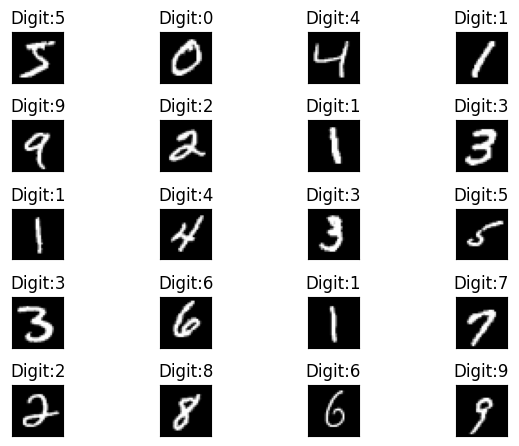

In [5]:
plot_digits(X_train, y_train)


In [6]:
# Consider The First 50000 samples As The Training Dataset
x_train_main = X_train[:50000]
y_train_main = y_train[:50000]

In [7]:
# Conside The Last 10000 Samples AS The Validation Dataset
x_val = X_train[50000:]
y_val = y_train[50000:]

In [8]:
x_train_main = x_train_main / 255.0
x_val=x_val/255.0
x_test = X_test / 255.0

In [9]:
x_train_main = x_train_main.reshape(50000, 28, 28, 1)
x_val = x_val.reshape(10000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [10]:
y_train_main = keras.utils.to_categorical(y_train_main, 10)
y_val = keras.utils.to_categorical(y_val, 10)
y_test = keras.utils.to_categorical(y_test, 10)

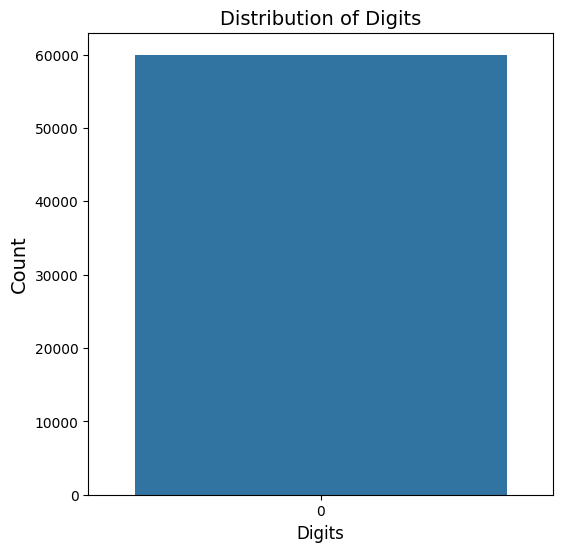

In [11]:
fig, ax = plt.subplots(figsize=(6,6))
sns.countplot(y_train)
ax.set_title('Distribution of Digits', fontsize=14)
ax.set_xlabel('Digits', fontsize=12)
ax.set_ylabel('Count', fontsize=14)
plt.show()

In [28]:
model = Sequential()

model.add(Conv2D(6, kernel_size=(5,5), padding='valid', activation='tanh', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(AveragePooling2D( pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(16, kernel_size=(5,5), activation='tanh', padding='valid'))
model.add(BatchNormalization())
model.add(AveragePooling2D( pool_size=(2,2), strides=2))

model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

In [29]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 24, 24, 6)      │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_4             │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_5             │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,514 (173.88 KB)

 Trainable params: 44,470 (173.71 KB)

 Non-trainable params: 44 (176.00 B)

In [30]:
adam = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

In [31]:
history = model.fit(x_train_main, y_train_main, epochs=30, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8445 - loss: 0.5297 - val_accuracy: 0.8896 - val_loss: 0.3196
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9669 - loss: 0.1071 - val_accuracy: 0.9719 - val_loss: 0.0943
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9810 - loss: 0.0627 - val_accuracy: 0.9728 - val_loss: 0.0877
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9859 - loss: 0.0465 - val_accuracy: 0.9822 - val_loss: 0.0611
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9888 - loss: 0.0361 - val_accuracy: 0.9826 - val_loss: 0.0583
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9932 - loss: 0.0251 - val_accuracy: 0.9839 - val_loss: 0.0542
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9933 - loss: 0.0228 - val_accuracy: 0.9863 - val_loss: 0.0506
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9951 - loss: 0.0167 - val_accuracy: 0

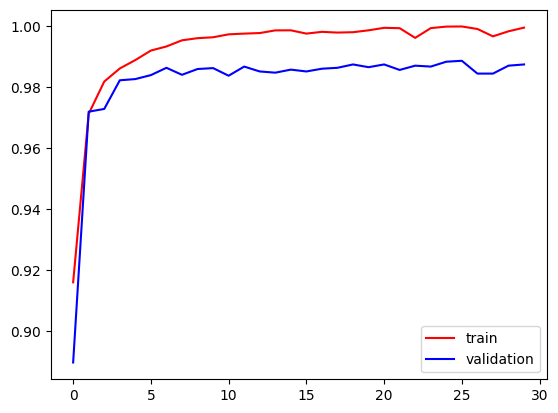

In [33]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()